<ipython-input-2-6abc9acb4c2b>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_none = filtered_df_none.groupby(['threshold']).mean()
<ipython-input-2-6abc9acb4c2b>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_attack = filtered_df_attack.groupby(['threshold']).mean()


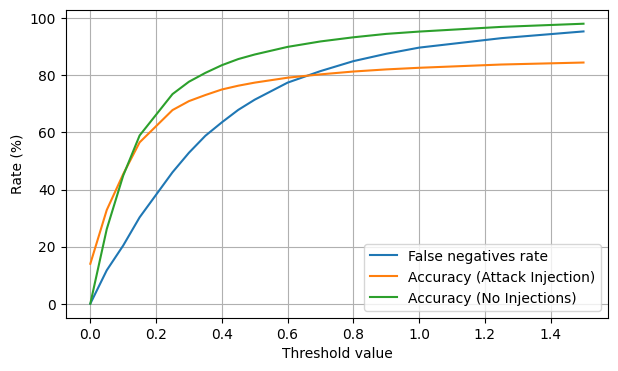

In [ ]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

type_dataset = "electricity"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('lstm_threshold_experiments.csv')

# Filter the DataFrame to exclude rows with "threshold" values from 1.75 to 5
filtered_df = df[(df['threshold'] < 1.75) | (df['threshold'] > 5)]

filtered_df_none = filtered_df[(filtered_df['attack injection'] == "None")]
filtered_df_attack = filtered_df[(filtered_df['attack injection'] != "None")]


# Group the data based on the "threshold" and calculate the mean
grouped_data_none = filtered_df_none.groupby(['threshold']).mean()
grouped_data_attack = filtered_df_attack.groupby(['threshold']).mean()

# Extract the mean values for "n_fn" and "accuracy"
mean_n_fn = grouped_data_attack['n_fn']
mean_accuracy_attack = grouped_data_attack['accuracy']
mean_accuracy_none = grouped_data_none['accuracy']

mean_n_fn_percentage = (mean_n_fn * 100) / 700
mean_accuracy_attack_percentage = mean_accuracy_attack * 100
mean_accuracy_none_percentage = mean_accuracy_none * 100

threshold_values = mean_n_fn.index

plt.figure(figsize=(7, 4))
plt.plot(threshold_values, mean_n_fn_percentage, label='False negatives rate')
plt.plot(threshold_values, mean_accuracy_attack_percentage, label='Accuracy (Attack Injection)')
plt.plot(threshold_values, mean_accuracy_none_percentage, label='Accuracy (No Injections)')

plt.xlabel('Threshold value')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

output_file = "threshold.png"
plt.savefig(output_file)
plt.show()